### Train a CNN on the MINST data

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from keras.wrappers.scikit_learn import KerasClassifier

### Load the data and preprocces the image

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

####  Show 15 numbers of the MNIST dataset.

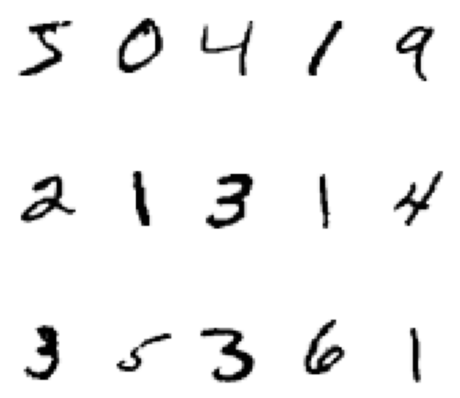

In [3]:
plt.figure(figsize=(8,8))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

### We need to reshape our X and Y data

make the input 4 dimensional.

In [4]:
X_train_reshaped = X_train.reshape((60000, 28, 28, 1))
X_test_reshaped = X_test.reshape((10000, 28, 28, 1))

# scale the output to range 0,1
X_train_reshaped = X_train_reshaped.astype('float32') / 255
X_test_reshaped = X_test_reshaped.astype('float32') / 255

num_classes = 10
y_train_reshaped = keras.utils.to_categorical(y_train,num_classes)
y_test_reshaped = keras.utils.to_categorical(y_test, num_classes)

### Define the model

    1. Provide input image into convolution layer
    2. Choose parameters, apply filters with strides, padding if requires. Perform convolution on the image and apply ReLU activation to the matrix.
    3. Perform pooling to reduce dimensionality size
    4. Add as many convolutional layers until satisfied
    5. Flatten the output and feed into a fully connected layer (FC Layer)
    6. Output the class using an activation function (Logistic Regression with cost functions) and classifies images.

### Now we can build the model
- We can define number of kernels
- The number of strides
- The activation function to be used

vgg_structure.jpg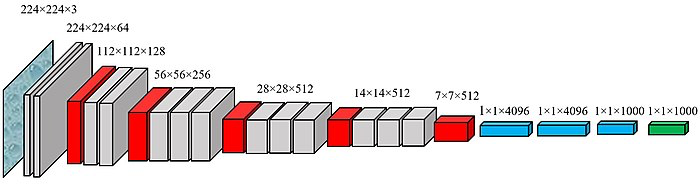

###### gray: CNN layers, red: pooling layers, blue: dense layers, green: softmax

#### General asumptions and observations:
A regularization Layer to be used before the Flatten Layer after a MaxPoolLayer in a CNN topology.

In [5]:
K.clear_session()

To make it Batch normalization enabled, we have to tell the Dense layer not using bias since it is not needed, it can save some calculation. Also, put the Activation layer after the BatchNormalization() layer.

Use regularization on the layer with the highest parameters only.

#### Future steps: work more with the size of the filters(kernels), the padding and the strides.

Kernel size impacts the shape of the output feature map.
Creates a border effect in the feature map and how it can be overcome with padding.
The stride of the filter on the input image can be used to downsample the size of the output feature map.


In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            input_shape=(28, 28, 1) # rows, cols, color channels
                            ))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=64,
                            padding='same',
                            kernel_size=(3,3),
                            use_bias=False,
                            input_shape=(28, 28, 1) 
                            ))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters=128,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            input_shape=(28, 28, 1)
                            ))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))


2021-07-11 21:54:54.874877: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.output_shape

(None, 10)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 64)          256       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0

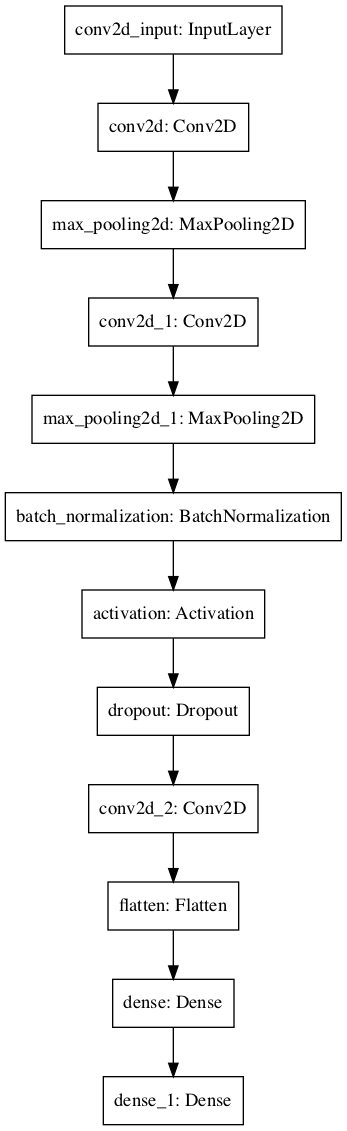

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model,
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

In [10]:

#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

#opt = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

### Compile the model

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### Start the training!

With 100 epochs, It reached a pick point at 46 epoch then stacked till the 100. Therefore i chose 50. 

In [12]:
input_dim = X_train_reshaped.shape[1]
batch_size = input_dim

In [13]:
results = model.fit(X_train_reshaped, y_train_reshaped, epochs=10, batch_size=150, validation_split=0.3)

2021-07-11 21:54:55.530352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
280/280 [==============================] - 43s 151ms/step - loss: 0.4907 - accuracy: 0.8485 - val_loss: 0.2847 - val_accuracy: 0.9838
Epoch 2/10
280/280 [==============================] - 42s 150ms/step - loss: 0.0500 - accuracy: 0.9832 - val_loss: 0.0490 - val_accuracy: 0.9851
Epoch 3/10
280/280 [==============================] - 42s 149ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 4/10
280/280 [==============================] - 42s 151ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 5/10
280/280 [==============================] - 42s 150ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.0384 - val_accuracy: 0.9888
Epoch 6/10
280/280 [==============================] - 66s 237ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 7/10
280/280 [==============================] - 74s 263ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0388 - val_ac

#### Calculate the accuracy.

In [ ]:
#return the maximum value
#results.history['val_accuracy'].max()—

In [14]:
results.history['val_accuracy']

[0.9837777614593506,
 0.9850555658340454,
 0.9883333444595337,
 0.988611102104187,
 0.988777756690979,
 0.9897222518920898,
 0.9894444346427917,
 0.9898889064788818,
 0.9901111125946045,
 0.9901666641235352]

In [15]:
results.history['accuracy']

[0.9398571252822876,
 0.9845476150512695,
 0.9900476336479187,
 0.9919762015342712,
 0.9934762120246887,
 0.9949285984039307,
 0.9957143068313599,
 0.9955952167510986,
 0.9964285492897034,
 0.9969047904014587]

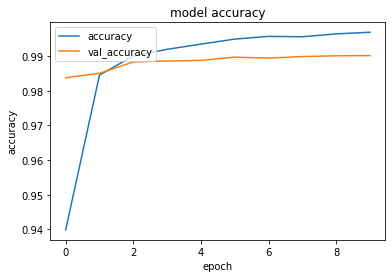

In [16]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

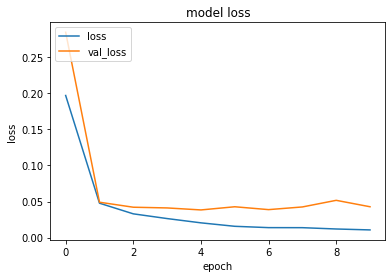

In [17]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

#### Evaluate the model

More or less like m.score, just for Neural Nets.

In [19]:
train_scores, train_histories = model.evaluate(X_train_reshaped, y_train_reshaped)
test_scores, test_histories = model.evaluate(X_test_reshaped, y_test_reshaped)
train_scores, train_histories
test_scores, test_histories

313/313 [==============================] - 5s 16ms/step - loss: 0.0364 - accuracy: 0.9911


(0.03636426106095314, 0.991100013256073)

In [20]:
y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)

In [21]:

y_test_reshaped =np.argmax(y_test_reshaped,axis = 1)

In [25]:
y_pred[2], y_test_reshaped[2]

(1, 1)

##### Save the model.

In [26]:
model.save('final_model.h5')

#### Make predictions.

In [ ]:
model.predict(X_test_reshaped)[:10]

In [ ]:
plt.figure(figsize=(8,8))
for i in range(1):
    plt.subplot(3, 5, 1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')
    number = i

#### Test if the model predicts correct.

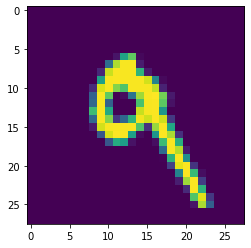

In [27]:
a_number = X_test_reshaped[7]

a_number.reshape(1,28,28,1)
plt.imshow(a_number)

In [28]:
a_number.shape

(28, 28, 1)

In [29]:
np.argmax(model.predict(a_number.reshape(1,28,28,1)), axis=-1)

array([9])